In [1]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
all_surfaces = pd.concat([nucleus_dataset_p4g4, nucleus_dataset_smooth, nucleus_dataset_tcps])

# 20x CD206 P4G4+TCPS+Smooth data

## Train XGBClassifier

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8817151263412946
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8874312386846219
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8818274197463609


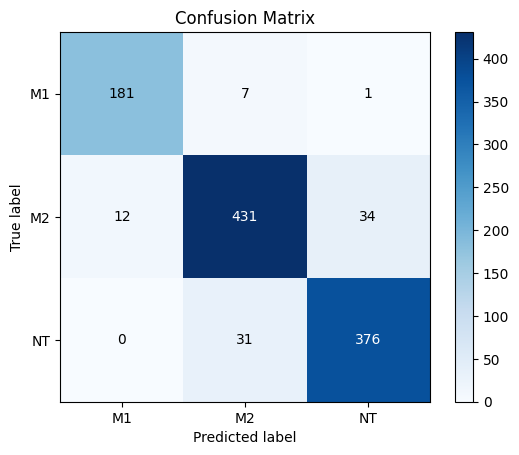

Calculate metrics for M1 and M2 only
____________________________________
 M1,   M2
[[181   7]
 [ 12 431]]
Accuracy (Correctly predicted M1+M2 / all predictions): 0.9698890649762282
Precision (Correctly predicted M1 / all cells predicted as M1): 0.9378238341968912
Sensitivity (Correctly predicted M1 / all actual M1): 0.9627659574468085
Specificity (Correctly predicted M2 / all actual M2): 0.9729119638826185
F1-score (How good the model performs in correctly identifying M1 and avoiding misclassifying M2): 0.9501312335958005


In [3]:
pipe, test_data = macrophages_analysis.make_nucleus_classifier(all_surfaces, confusion_matrix=True)
macrophages_analysis.calculate_metrics_for_M1_M2(pipe, test_data)

## One-vs-Rest multiclass ROC

AUC score for M1 0.9980188656659245
AUC score for M2 0.9815401066509082
AUC score for NT 0.9870878249256627
Average AUC 0.9888822657474985


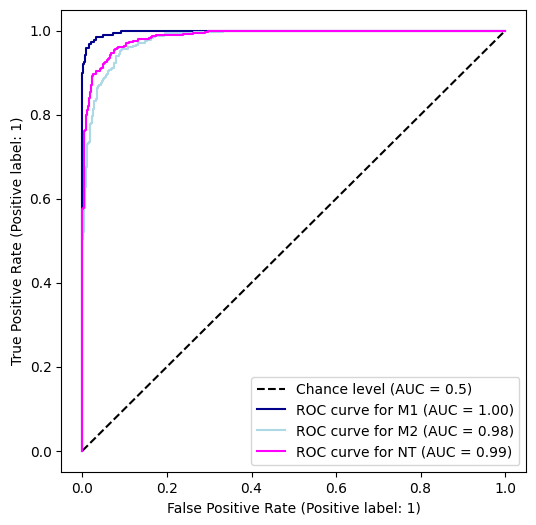

In [4]:
macrophages_analysis.make_multiclass_roc(pipe, test_data)

## Get the most important features

<AxesSubplot:ylabel='Feature'>

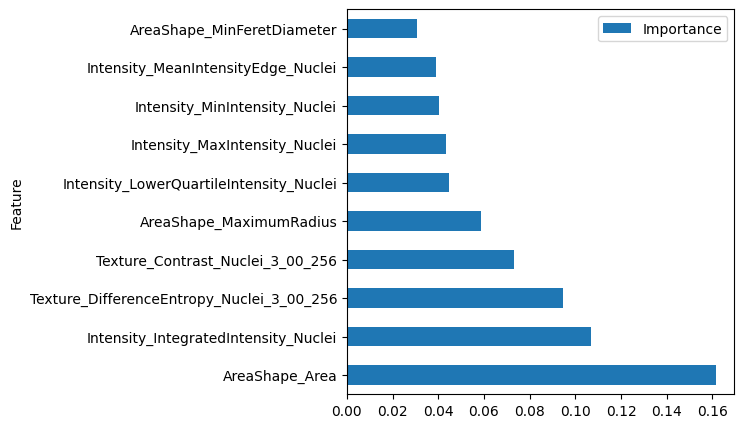

In [5]:
important_features_smooth = macrophages_analysis.get_best_features(pipe, all_surfaces.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))   

# 20x CD206 P4G4+TCPS+Smooth data without intestity features

In [6]:
nucleus_dataset_p4g4_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_smooth_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_intensity_data.csv')
nucleus_dataset_tcps_no_intensity = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_intensity_data.csv')
all_surfaces_no_intensity = pd.concat([nucleus_dataset_p4g4_no_intensity, nucleus_dataset_smooth_no_intensity, nucleus_dataset_tcps_no_intensity])

## Train XGBClassifier

In [ ]:
pipe_no_intensity, test_data_no_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_intensity, confusion_matrix=True)

## One-vs-Rest multiclass ROC

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_no_intensity, test_data_no_intensity)

## Get the most important features

In [ ]:
important_features_smooth = macrophages_analysis.get_best_features(pipe_no_intensity, all_surfaces_no_intensity.drop('CellType', axis=1), 10)
important_features_smooth.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

# 20x CD86 P4G4+TCPS+Smooth data without shape features

In [ ]:
nucleus_dataset_p4g4_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_smooth_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset_no_shape_data.csv')
nucleus_dataset_tcps_no_shape = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset_no_shape_data.csv')
all_surfaces_no_shape = pd.concat([nucleus_dataset_p4g4_no_shape, nucleus_dataset_smooth_no_shape, nucleus_dataset_tcps_no_shape])

## Train XGBClassifier

In [ ]:
pipe_no_shape, test_data_no_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_no_shape, confusion_matrix=True)

## One-vs-Rest multiclass ROC

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_no_shape, test_data_no_shape)

## Get the most important features

In [ ]:
important_features_tcps = macrophages_analysis.get_best_features(pipe_no_shape, all_surfaces_no_shape.drop('CellType', axis=1), 10)
important_features_tcps.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

## 20x CD86 P4G4+TCPS+Smooth data only shape features

In [ ]:
nucleus_dataset_p4g4_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Area')
nucleus_dataset_smooth_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Area')
nucleus_dataset_tcps_shape = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Area')
all_surfaces_shape = pd.concat([nucleus_dataset_p4g4_shape, nucleus_dataset_smooth_shape, nucleus_dataset_tcps_shape])

In [ ]:
pipe_shape, test_data_shape = macrophages_analysis.make_nucleus_classifier(all_surfaces_shape, confusion_matrix=True)

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_shape, test_data_shape)

In [ ]:
important_features = macrophages_analysis.get_best_features(pipe_shape, all_surfaces_shape.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

## 20x CD86 P4G4+TCPS+Smooth data only texture features

In [ ]:
nucleus_dataset_p4g4_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Texture')
nucleus_dataset_smooth_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Texture')
nucleus_dataset_tcps_texture = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Texture')
all_surfaces_texture = pd.concat([nucleus_dataset_p4g4_texture, nucleus_dataset_smooth_texture, nucleus_dataset_tcps_texture])

In [ ]:
pipe_texture, test_data_texture = macrophages_analysis.make_nucleus_classifier(all_surfaces_texture, confusion_matrix=True)

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_texture, test_data_texture)

In [ ]:
important_features = macrophages_analysis.get_best_features(pipe_texture, all_surfaces_texture.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))

## 20x CD86 P4G4+TCPS+Smooth data only intensity features

In [ ]:
nucleus_dataset_p4g4_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_p4g4, 'Intensity')
nucleus_dataset_smooth_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_smooth, 'Intensity')
nucleus_dataset_tcps_intensity = macrophages_analysis.select_features_by_name(nucleus_dataset_tcps, 'Intensity')
all_surfaces_intensity = pd.concat([nucleus_dataset_p4g4_intensity, nucleus_dataset_smooth_intensity, nucleus_dataset_tcps_intensity])

In [ ]:
pipe_intensity, test_data_intensity = macrophages_analysis.make_nucleus_classifier(all_surfaces_intensity, confusion_matrix=True)

In [ ]:
all_surfaces_intensity.columns.to_list()

In [ ]:
macrophages_analysis.make_multiclass_roc(pipe_intensity, test_data_intensity)

In [ ]:
important_features = macrophages_analysis.get_best_features(pipe_intensity, all_surfaces_intensity.drop('CellType', axis=1), 10)
important_features.plot(x='Feature', y='Importance', kind='barh', figsize=(5, 5))